# Investigation Program Languages Used by Developers

The purpose of this analysis is to answer the question "what are the best programming languages to learn to be a Developer". For this analysis we utilize survey results from StackOverflow.  The results of this analysis will be utilzied to write a blog post.  As such we will create clean charts to be utilzied in this blog.

### Initial load

Packages are imported.  Additionally the survey data will be loaded from a flat file obtained and downloaded to my local drive from Kaggle (https://www.kaggle.com/stackoverflow/so-survey-2017).

In [59]:
# Import packages
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline


In [60]:
# load and check survey data
df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# Load and check schema info
schema = pd.read_csv('./survey_results_schema.csv')
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


### Investigate 
Now that the data files are loaded let's investigate columns that might help us understand programming languages used by Professional Developers.

In [62]:
# Use Schema to find columns related to Languages

schema[schema["Question"].str.contains("language")]

,Column,Question
53,AssessJobTech,When you're assessing potential jobs to apply ...
88,HaveWorkedLanguage,Which of the following languages have you done...
89,WantWorkLanguage,Which of the following languages have you done...



Rows 88 and 89 look like they might be promising.  Let's check the full question text


In [63]:
print(schema.iloc[88,1])
print(schema.iloc[89,1])

Which of the following languages have you done extensive development work in over the past year, and which do you want to work in over the next year?
Which of the following languages have you done extensive development work in over the past year, and which do you want to work in over the next year?


These look like they can help us answer our question.  Let's take a deeper look into what the entries look like.

In [64]:
# Get value counts for HaveWorkedLanguage
df.HaveWorkedLanguage.value_counts()

C#; JavaScript; SQL                                                              1276
JavaScript; PHP; SQL                                                             1143
Java                                                                              913
JavaScript                                                                        807
JavaScript; PHP                                                                   662
Java; JavaScript; SQL                                                             645
Java; JavaScript                                                                  585
C#                                                                                540
Python                                                                            529
C#; JavaScript                                                                    500
C#; SQL                                                                           494
C#; JavaScript; SQL; TypeScript                       

In [65]:
# Get value counts for WantWorkLanguage
df.WantWorkLanguage.value_counts()

JavaScript                                                                          642
Python                                                                              556
Java                                                                                544
C#                                                                                  475
C#; JavaScript; SQL                                                                 444
Java; JavaScript                                                                    332
C#; JavaScript; SQL; TypeScript                                                     326
JavaScript; PHP; SQL                                                                324
C++                                                                                 317
Swift                                                                               306
JavaScript; Python                                                                  300
C#; SQL                         

Both columns utilzie a semicolon seperated format.  We will need break this into a list or something we can better work with.  Examining the specific entries, it looks like consistent namign conventions are used for the languages (capitalization, etc).  However it looks like some entries have leading spaces and some do not.  We will have to account for that in our cleaning.

Let's also check for missing values

In [66]:
# Check for missing values and total number of entries
print("Missinng entries:")
print(df[['HaveWorkedLanguage','WantWorkLanguage']].isnull().sum(axis=0))
print("Total Entries:       ",df.shape[0])

Missinng entries:
HaveWorkedLanguage    14767
WantWorkLanguage      17621
dtype: int64
Total Entries:        51392


Seems we have a large percentage of missing entries in the Language columns.  However, looking at entries in other columns this might be because we have entries from people that are not Developers or are not employed.  Since we want to to focus on what langauge employed, Professional Developers use, we should subset the data.

In [67]:
# subset data to Professional Developer and employed full time.  Then check for NAs
df_prof_emp = df[(df['Professional']=="Professional developer") & (df['EmploymentStatus']=="Employed full-time")]
print('Missing entries from employed, Professional developers:')
print(df_prof_emp[['HaveWorkedLanguage','WantWorkLanguage']].isnull().sum(axis=0))
print('Total entries:      ',df_prof_emp.shape[0])

Missing entries from employed, Professional developers:
HaveWorkedLanguage    7285
WantWorkLanguage      9180
dtype: int64
Total entries:       30211


Well, even within the subset we see a high rate of missing entries.  Since it seems logical that employed, professional developers would have languages they program in and want to program in, we can assume these missing values are because of people skippng this question.  In any case we will exclude these entries as it doesn't make sense to extrapolate them.

### Analyze column HaveWorkedLanguage

We will now analyze the HaveWorkedLanguage column to gain understanding about what languages have been utilized by employed, professional developers.  We will start by breaking down the semicolon seperated entries into lists.  Then add up number of rows are calling out each language.

In [68]:
# Function to get counts of entries by programming language

def language_counts(df,col):
    '''
    Function to get counts of entries that answered each programming langauage.
    
    Inputs:
        df- pandas dataframe with survey data
        col- string with name of column to be investigated
    
    Outputs:
        pandas dataframe with columns for language, count of entries, and % of entries
            sorted by counts.
    '''
    
    # split string of entries into list of langauges
    df[col] = df[col].str.replace(' ','')
    val_count = df[col].value_counts().reset_index()
    val_count['index'] = val_count['index'].str.split(';')
    
    # create list of unique language entries
    entries = val_count['index'].tolist()
    entries = [item for items in entries for item in items]  #un-nest list of lists
    entries = list(set(entries))
    
    out_df = defaultdict(int)
    
    #loop through Languages
    for language in entries:
        for idx in range(val_count.shape[0]):
            if language in val_count['index'][idx]:
                out_df[language] += int(val_count[col][idx])
    out_df = pd.DataFrame(pd.Series(out_df)).reset_index()
    out_df.columns = ["Language","Count"]
    out_df['Percent'] = out_df.Count/df[col].count() * 100
    out_df.sort_values("Count",ascending=False, inplace=True)
    return out_df
    

In [69]:
# Get language counts for HaveWorkedLanguage
have_worked = language_counts(df_prof_emp,col='HaveWorkedLanguage')
have_worked

C:\Users\jhenzi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Language,Count,Percent
16,JavaScript,15226,66.413679
27,SQL,12336,53.807904
15,Java,8793,38.353834
2,C#,8628,37.634127
23,Python,6235,27.196196
21,PHP,5821,25.390386
3,C++,4236,18.476839
1,C,3306,14.420309
31,TypeScript,2561,11.170723
25,Ruby,2156,9.404170


The breakdown of counts by programming language is shown above.  Unsurprisingly we see that Java, SQL, C, and Python near the top.  Let's plot the data to be a bit more visually appealing and for ease of comparisons.

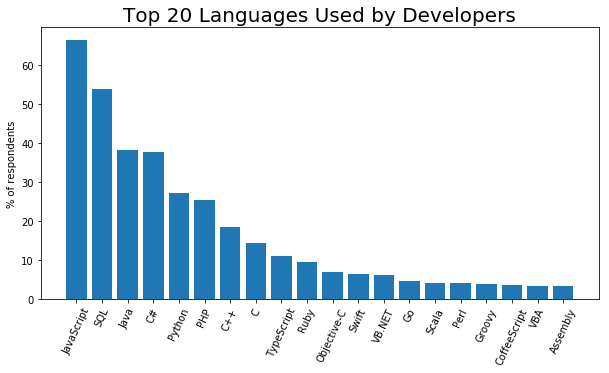

In [70]:
# plot the top 20
plt.rcParams["figure.figsize"]=10,5

plt.bar(have_worked.Language[0:20],have_worked.Percent[0:20])
plt.xticks(rotation=65)
plt.ylabel("% of respondents")
plt.title("Top 20 Languages Used by Developers",size=20);

plt.savefig('use.jpg', bbox_inches='tight')

### Analyze column WantWorkLanguage

We will now analyze the WantWorkLanguage in a similar fashion as HaveWorkedLanguage.

In [71]:
# Get language counts for WantWorkLanguage
want_work = language_counts(df_prof_emp,col='WantWorkLanguage')
want_work

C:\Users\jhenzi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Language,Count,Percent
16,JavaScript,10581,50.311445
27,SQL,7093,33.726404
23,Python,7000,33.284200
2,C#,6776,32.219105
15,Java,5913,28.115639
31,TypeScript,4241,20.165470
3,C++,3931,18.691455
11,Go,3837,18.244496
30,Swift,2841,13.508630
21,PHP,2763,13.137749


Again we see Java, SQL, C, and Python near the top, but now we see some other languages like TypeScript and Go moving up the list.  As before we will plot the data.

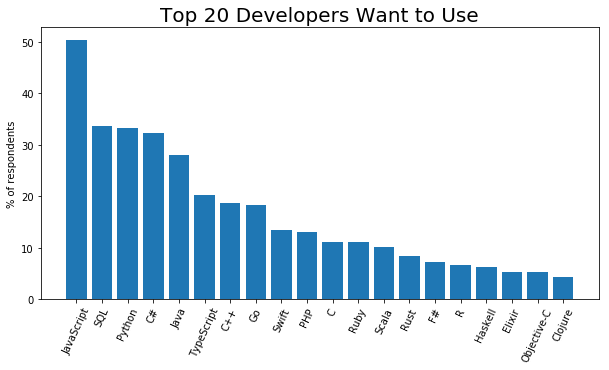

In [72]:
# PLot Top 20
plt.rcParams["figure.figsize"]=10,5

plt.bar(want_work.Language[0:20],want_work.Percent[0:20])
plt.xticks(rotation=65)
plt.ylabel("% of respondents")
plt.title("Top 20 Developers Want to Use",size=20);

plt.savefig('want.jpg', bbox_inches='tight')

### Analyze delta between "have worked" and "want work" languages

Looking at the delta between these two has potential to give good insight.  Specifically it can tell us what languages are decreasing in popularaity and which ones are gaining. We'll start by joining the 2 tables

In [73]:
# Join have_worked aqnd want_work
merged = pd.merge(have_worked, want_work, left_on="Language", right_on="Language", how= "outer")
merged.columns = ['Language','Count_Have_Work', 'Percent_Have_Work','Count_Want_Work', 'Percent_Want_Work']
merged.head()

,Language,Count_Have_Work,Percent_Have_Work,Count_Want_Work,Percent_Want_Work
0,JavaScript,15226,66.413679,10581,50.311445
1,SQL,12336,53.807904,7093,33.726404
2,Java,8793,38.353834,5913,28.115639
3,C#,8628,37.634127,6776,32.219105
4,Python,6235,27.196196,7000,33.284200


Let's add some comparisons...delta in percent of respondents calling out each language as well as the percentage change.

In [74]:
merged['delta'] = merged.Percent_Want_Work - merged.Percent_Have_Work
merged['Percent_delta'] = merged.delta/merged.Percent_Have_Work * 100
merged.head()

,Language,Count_Have_Work,Percent_Have_Work,Count_Want_Work,Percent_Want_Work,delta,Percent_delta
0,JavaScript,15226,66.413679,10581,50.311445,-16.102234,-24.245357
1,SQL,12336,53.807904,7093,33.726404,-20.081500,-37.320725
2,Java,8793,38.353834,5913,28.115639,-10.238195,-26.694059
3,C#,8628,37.634127,6776,32.219105,-5.415022,-14.388595
4,Python,6235,27.196196,7000,33.284200,6.088003,22.385494


Let's plot the results to get a visual comparison.

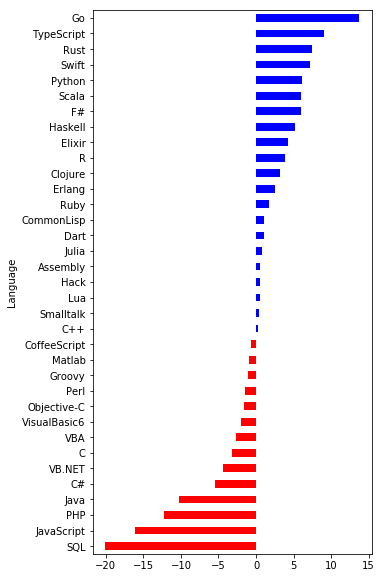

In [75]:
# Plot the delta column

# Sort and add indicator for positive values
merged.sort_values("delta",ascending=True, inplace=True)
merged['positive_delta'] = merged['delta'] > 0

# Plot
plt.rcParams["figure.figsize"]=5,10
merged.plot.barh(x='Language',y='delta', color = merged.positive_delta.map({True:'b',False:'r'}), legend=False);

This is an interesting view.  We can see which languages are gaining popularity and which are declining.  It would be interesting to include the percent of respondents that want to use the language as I think soem of the big decliners are still top languages.

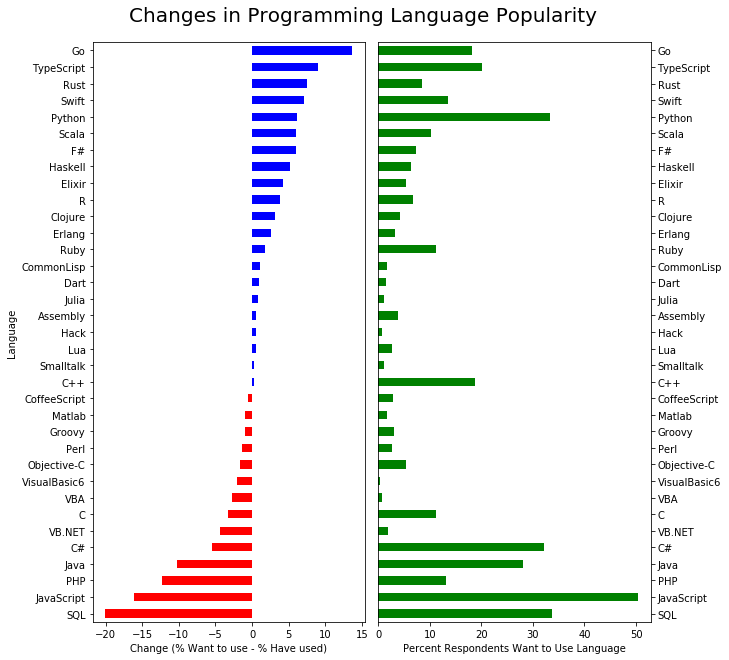

In [76]:
# Plot deltas with want work information

fig, ax = plt.subplots(ncols=2, figsize=(10,10))

fig.suptitle("Changes in Programming Language Popularity",size=20)
fig.subplots_adjust(top=0.93)
fig.subplots_adjust(wspace=0.05)

merged.plot.barh(x='Language',y='delta', color = merged.positive_delta.map({True:'b',False:'r'}), 
                 legend=False, ax=ax[0])
ax[0].set_xlabel('Change (% Want to use - % Have used)')

merged.plot.barh(x='Language',y='Percent_Want_Work', color = 'g', legend=False, ax=ax[1])
ax[1].set_xlabel('Percent Respondents Want to Use Language')
ax[1].set_ylabel('')
ax[1].yaxis.tick_right()

plt.savefig('change.jpg', bbox_inches='tight')


References:
* https://stackoverflow.com/questions/20112776/how-do-i-flatten-a-list-of-lists-nested-lists
* https://stackoverflow.com/questions/22311139/matplotlib-bar-chart-choose-color-if-value-is-positive-vs-value-is-negative
* https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it-using-matplotlib